# AIN 214 - PA4 - 2023
## Building kNN and Logistic Regression Classifiers


# THE STUDENT INFO
## Student Name: Abdulkadir Parlak
## Student ID: 2210765025

# Dataset: We will use the Breast Cancer Wisconsin (Diagnostic) Dataset available on Kaggle for the assignment. 
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## 1. Data Preprocessing

In this section, you will:
- Import necessary libraries
- Load the dataset
- Handle missing values and outliers
- Convert non-numeric values to numeric 
- Perform data normalization

In [264]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, label_binarize
from sklearn import metrics

In [265]:
# Load dataset

df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [266]:
# Handle the missing values
print(df.isnull().sum())
df = df.dropna(axis=1) # drop the null column at the end
df.head()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Convert non-numeric data to numeric data

In [267]:
encoder = OneHotEncoder() # non-ordinal data, diagnosis type
one_hot_encoded = encoder.fit_transform(df[['diagnosis']])

# Convert the result to a dataframe
one_hot_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['diagnosis']))

# concatenate the extra columns with the original dataset
encoded_df = pd.concat([df, one_hot_df], axis=1)

encoded_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0,1.0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0,1.0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0,1.0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0,1.0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0,1.0


# Outlier Handling
Outlier method: IQR method, Median Imputation

In [268]:
# radius_mean
for i in range(2):
    
    Q1 = encoded_df['radius_mean'].quantile(0.25)
    Q3 = encoded_df['radius_mean'].quantile(0.75)
    IQR = Q3 - Q1
    radius_mean_outliers = (encoded_df['radius_mean'] < (Q1 - 1.5 * IQR)) | (encoded_df['radius_mean'] > (Q3 + 1.5 * IQR))
    
    median = df['radius_mean'].median()
    encoded_df.loc[radius_mean_outliers, 'radius_mean'] = median

print(encoded_df['radius_mean'][radius_mean_outliers].count())

# After first median imputation, there were still outliers in the dataset, so I did double median imputation.
# There are still some outliers after second median imputation. But there are just 6.
# I thought about using winsorization, but I dropped the idea.

6


In [269]:
# the rest
# Handle all the other columns' outliers
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# apply outlier detection and median imputation for all columns with a loop
for column in numerical_cols:
    median_value = df[column].median()
    # Calculate IQR and identify outliers
    Q1 = encoded_df[column].quantile(0.25)
    Q3 = encoded_df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (encoded_df[column] < (Q1 - 1.5 * IQR)) | (encoded_df[column] > (Q3 + 1.5 * IQR))

    # Replace outliers with the median
    encoded_df.loc[outliers, column] = median_value


# Data Normalization

In [270]:
# Normalization is only applied to numerical columns, so we have to first separate numerical and categorical data.
# separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a dataframe with only numerical columns
df_numerical = df[numerical_cols]

# Using sklearn's Z-Score Normalization
# apply StandardScaler to numerical columns only
standard_scaler = StandardScaler()
df_standardized = pd.DataFrame(standard_scaler.fit_transform(df_numerical), columns=numerical_cols)

# concatenate standardized numerical columns with categorical columns
df_processed = pd.concat([df_standardized, df[categorical_cols]], axis=1)

## 2. Data Visualization

Visualize the data to understand it better:
- Correlation heatmap
- Distribution plots for at least 3 features


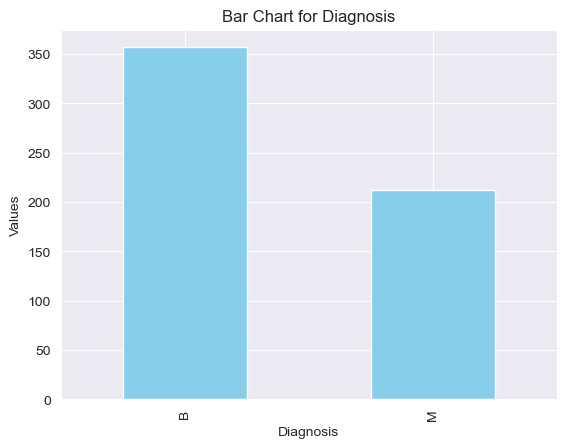

In [271]:
# Distribution of diagnosis

# how many occurrences of each category
category_counts = df['diagnosis'].value_counts()

# plotting a bar chart
category_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart for Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Values')
plt.show()

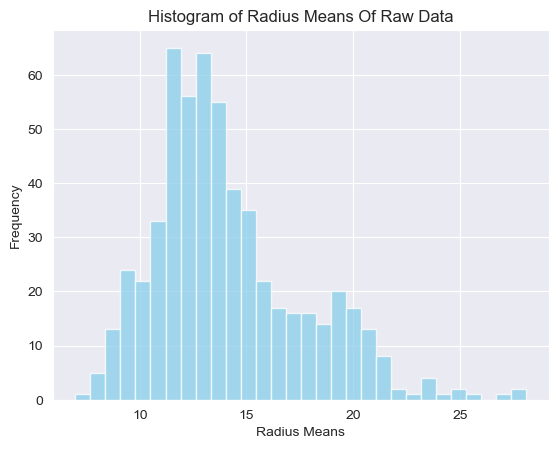

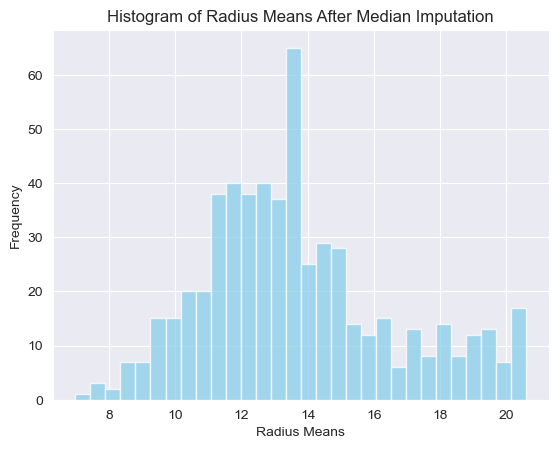

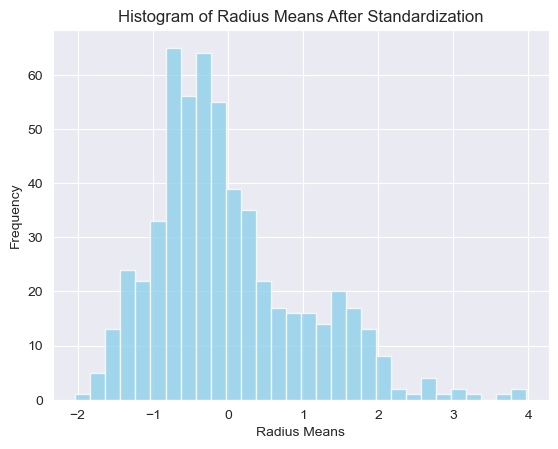

In [272]:
# Distribution of radius_mean

# plotting histogram plot before median imputation
plt.hist(df['radius_mean'], bins=30, color='skyblue', alpha=0.75)
plt.xlabel('Radius Means')
plt.ylabel('Frequency')
plt.title('Histogram of Radius Means Of Raw Data')
plt.show()

# plotting histogram plot after median imputation
plt.hist(encoded_df['radius_mean'], bins=30, color='skyblue', alpha=0.75)
plt.xlabel('Radius Means')
plt.ylabel('Frequency')
plt.title('Histogram of Radius Means After Median Imputation')
plt.show()

# plotting histogram plot after standardization(normalization)
plt.hist(df_processed['radius_mean'], bins=30, color='skyblue', alpha=0.75)
plt.xlabel('Radius Means')
plt.ylabel('Frequency')
plt.title('Histogram of Radius Means After Standardization')
plt.show()

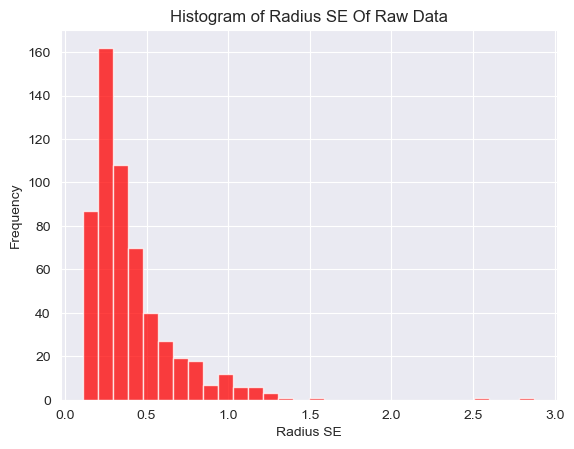

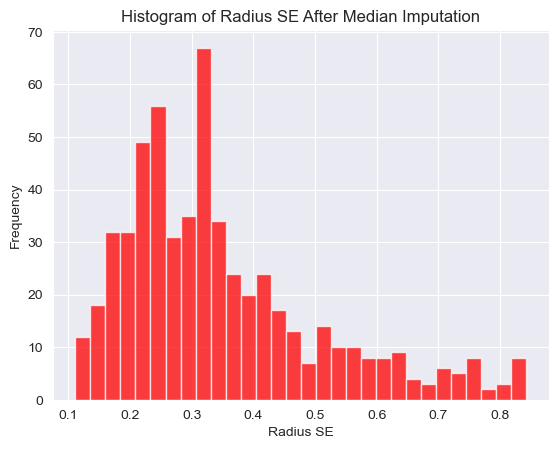

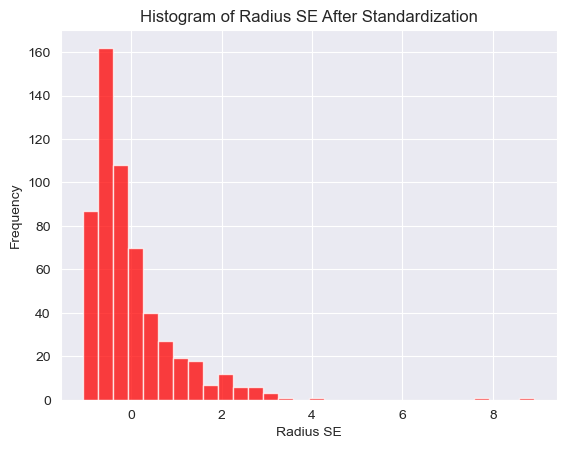

In [273]:
# Distribution of radius_se

# plotting histogram plot before median imputation
plt.hist(df['radius_se'], bins=30, color='red', alpha=0.75)
plt.xlabel('Radius SE')
plt.ylabel('Frequency')
plt.title('Histogram of Radius SE Of Raw Data')
plt.show()

# plotting histogram plot after median imputation
plt.hist(encoded_df['radius_se'], bins=30, color='red', alpha=0.75)
plt.xlabel('Radius SE')
plt.ylabel('Frequency')
plt.title('Histogram of Radius SE After Median Imputation')
plt.show()

# plotting histogram plot after standardization(normalization)
plt.hist(df_processed['radius_se'], bins=30, color='red', alpha=0.75)
plt.xlabel('Radius SE')
plt.ylabel('Frequency')
plt.title('Histogram of Radius SE After Standardization')
plt.show()

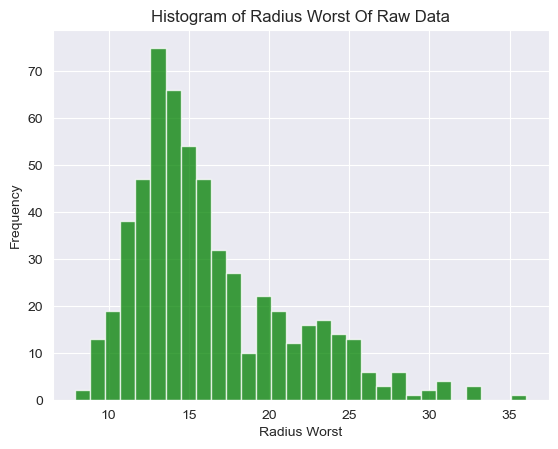

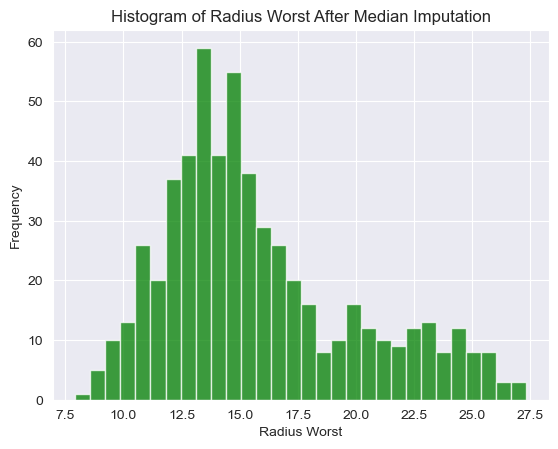

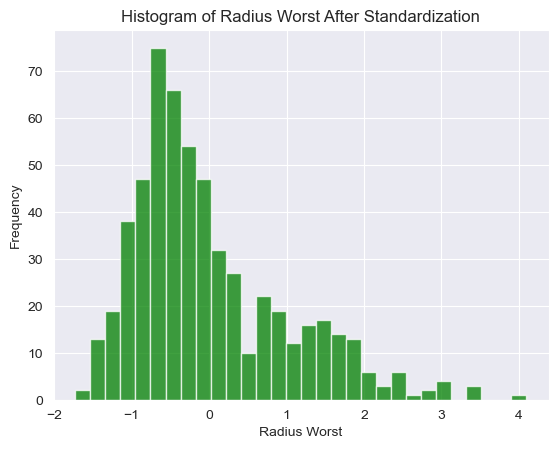

In [274]:
# Distribution of radius_worst

# plotting histogram plot before median imputation
plt.hist(df['radius_worst'], bins=30, color='green', alpha=0.75)
plt.xlabel('Radius Worst')
plt.ylabel('Frequency')
plt.title('Histogram of Radius Worst Of Raw Data')
plt.show()

# plotting histogram plot after median imputation
plt.hist(encoded_df['radius_worst'], bins=30, color='green', alpha=0.75)
plt.xlabel('Radius Worst')
plt.ylabel('Frequency')
plt.title('Histogram of Radius Worst After Median Imputation')
plt.show()

# plotting histogram plot after standardization(normalization)
plt.hist(df_processed['radius_worst'], bins=30, color='green', alpha=0.75)
plt.xlabel('Radius Worst')
plt.ylabel('Frequency')
plt.title('Histogram of Radius Worst After Standardization')
plt.show()

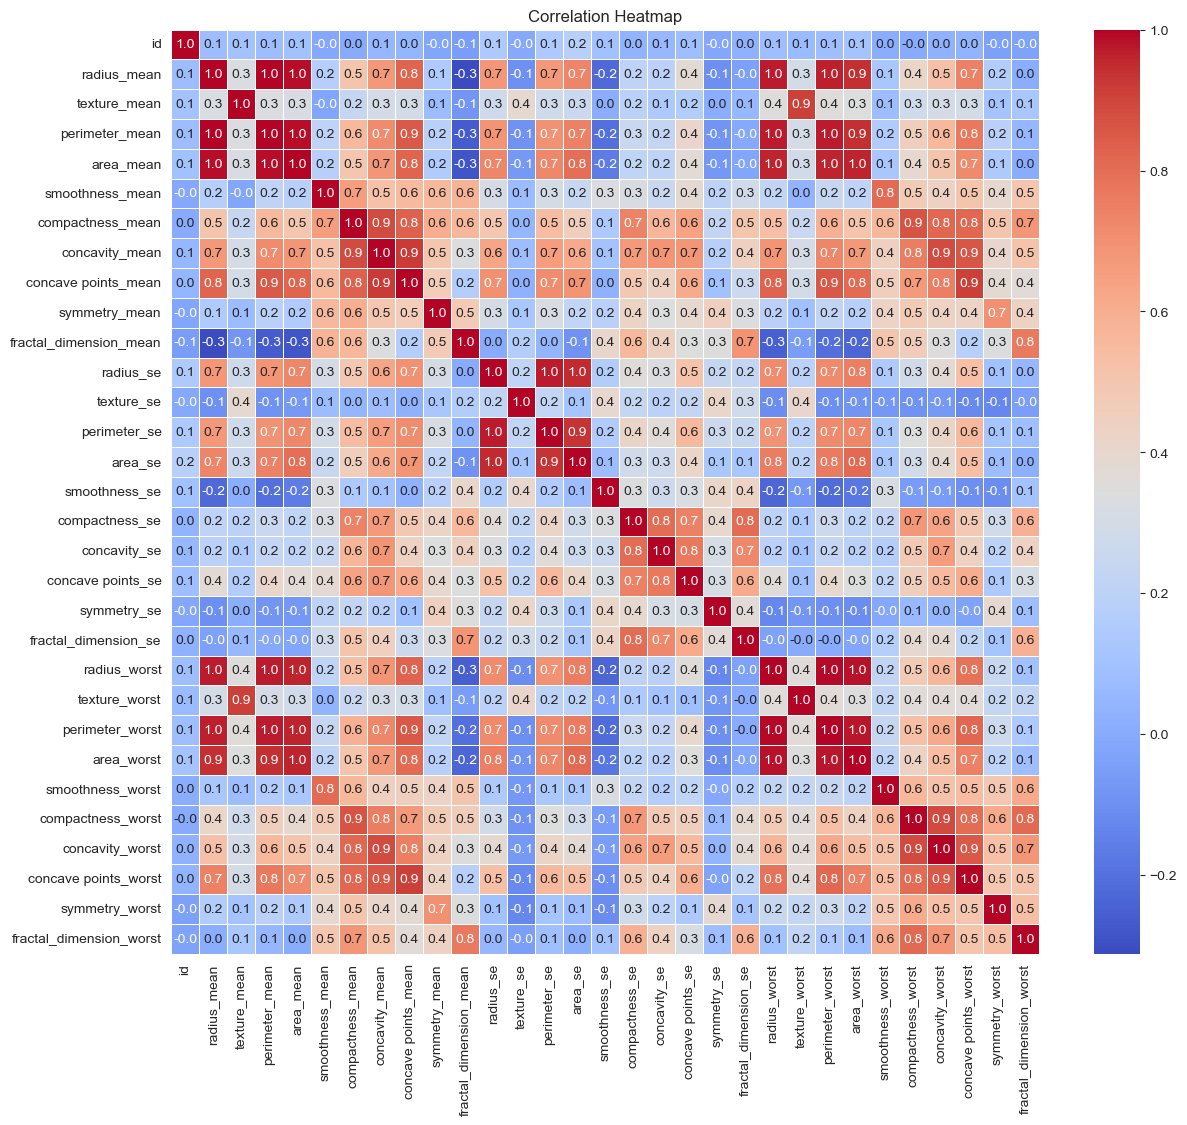

In [275]:
# Correlation heatmap

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns # numerical data only

# Create a DataFrame with only numerical columns
df_numerical = df[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Create a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 3. Data Splitting

Manually split the data into training and testing sets in a 70:30 ratio:
- Shuffle and split the data
- Avoid using predefined functions like train_test_split for this task


In [276]:
def custom_train_test_split(df, target_column, test_ratio=0.3, random_state=None):
    if random_state is not None:
        df = df.sample(frac=1, random_state=random_state)  # shuffle the DataFrame with a specific seed, it ensures that every time split is called
                                                           # it will have the same train and test sets.
    else:
        df = df.sample(frac=1)
        
    num_samples = len(df) # num_samples is the number of records(samples) in the dataset 
    num_test_samples = int(test_ratio * num_samples) # num_test_samples is the number of samples of test_set
    
    train_set = df.iloc[num_test_samples:].reset_index(drop=True)
    test_set = df.iloc[:num_test_samples].reset_index(drop=True) # test_set is the slice of the dataset until num_test_samples
    
    x_train = train_set.drop(columns=[target_column])
    y_train = train_set[target_column]

    x_test = test_set.drop(columns=[target_column])
    y_test = test_set[target_column]

    return x_train, x_test, y_train, y_test

## 4. Model Building

### 4.1. kNN Classifier

- Build and train the kNN model
- Choose the optimal k value using Minkowski distance with at least two different values for p 

In [277]:
#split the data into train and test sets
#last_df = df_processed.drop(columns=['id'])
x_train, x_test, y_train, y_test = custom_train_test_split(df_processed, "diagnosis", 0.3, random_state=42)

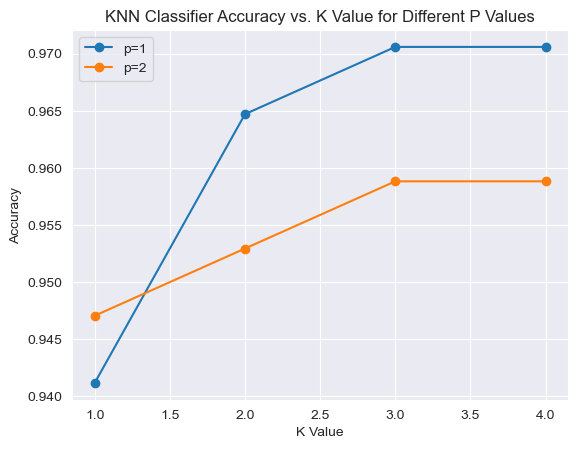

In [278]:
# possible k values
k_values = range(1, 5)

best_accuracy_kNN = 0
best_k = None
best_p = None
y_pred_knn = None
best_knn_model = None

accuracies_p1 = []
accuracies_p2 = []

# iterate over k and p values
for k in k_values:
    # Create a KNN classifier with p=1
    knn_p1 = KNeighborsClassifier(n_neighbors=k, p=1)
    knn_p1.fit(x_train, y_train)
    y_pred_p1 = knn_p1.predict(x_test)
    accuracy_p1 = metrics.accuracy_score(y_test, y_pred_p1)
    accuracies_p1.append(accuracy_p1)
    
    # Update the best parameters if the current model is better
    if accuracy_p1 > best_accuracy_kNN:
        best_accuracy_kNN = accuracy_p1
        best_knn_model = knn_p1
        y_pred_knn = y_pred_p1
        best_k = k
        best_p = 1

    # Create a KNN classifier with p=2
    knn_p2 = KNeighborsClassifier(n_neighbors=k, p=2)
    knn_p2.fit(x_train, y_train)
    y_pred_p2 = knn_p2.predict(x_test)
    accuracy_p2 = metrics.accuracy_score(y_test, y_pred_p2)
    accuracies_p2.append(accuracy_p2)

    # Update the best parameters if the current model is better
    if accuracy_p2 > best_accuracy_kNN:
        best_accuracy_kNN = accuracy_p2
        best_knn_model = knn_p2
        y_pred_knn = y_pred_p2
        best_k = k
        best_p = 2
            
# Create a plot to visualize the relationship between k,p values and accuracy
plt.plot(k_values, accuracies_p1, label='p=1', marker='o')
plt.plot(k_values, accuracies_p2, label='p=2', marker='o')

plt.title('KNN Classifier Accuracy vs. K Value for Different P Values')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 4.2. Logistic Regression

- Build and train the Logistic Regression model

In [279]:
# create an instance of Logistic Regression model
logistic_regression_model = LogisticRegression()

# fit the model with the training data
logistic_regression_model.fit(x_train, y_train)

# make predictions on the test set
y_pred_logistic = logistic_regression_model.predict(x_test)

# evaluate the performance of the model

accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9823529411764705


## 5. Model Evaluation

### 5.1. Confusion Matrix

Analysis of the confusion matrices for both models:
- Plot and interpret the confusion matrices
- Display accuracy, precision, recall, and F1-score for both models

KNN Classification Report


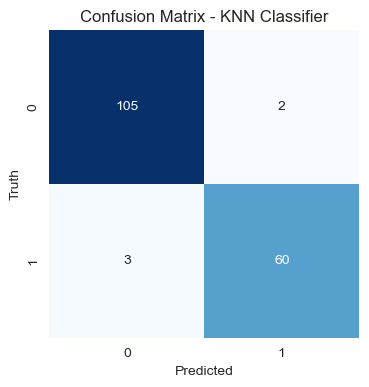

Classification Report - KNN Classifier:
              precision    recall  f1-score   support

           B       0.97      0.98      0.98       107
           M       0.97      0.95      0.96        63

    accuracy                           0.97       170
   macro avg       0.97      0.97      0.97       170
weighted avg       0.97      0.97      0.97       170

Logistic Regression Report


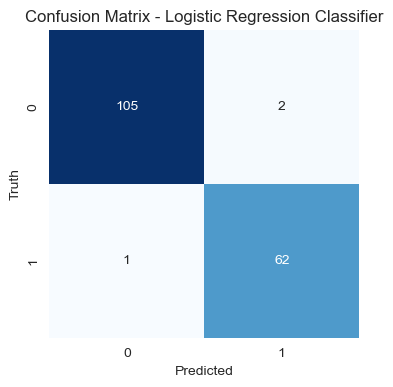

Classification Report - Logistic Regression Classifier:
              precision    recall  f1-score   support

           B       0.99      0.98      0.99       107
           M       0.97      0.98      0.98        63

    accuracy                           0.98       170
   macro avg       0.98      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170


In [280]:
# Confusion Matrix of KNN Classifier
print("KNN Classification Report")
cm1 = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(4, 4))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix - KNN Classifier")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

report1 = classification_report(y_test, y_pred_knn)
print(f"Classification Report - KNN Classifier:\n{report1}")

# Confusion Matrix of Logistic Regression Classifier
print("Logistic Regression Report")
cm2 = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(4, 4))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix - Logistic Regression Classifier")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

report2 = classification_report(y_test, y_pred_logistic)
print(f"Classification Report - Logistic Regression Classifier:\n{report2}")

### 5.2. Precision-Recall Curves

Evaluate the Precision-Recall curves for both models:
- Plot and analyze the curves

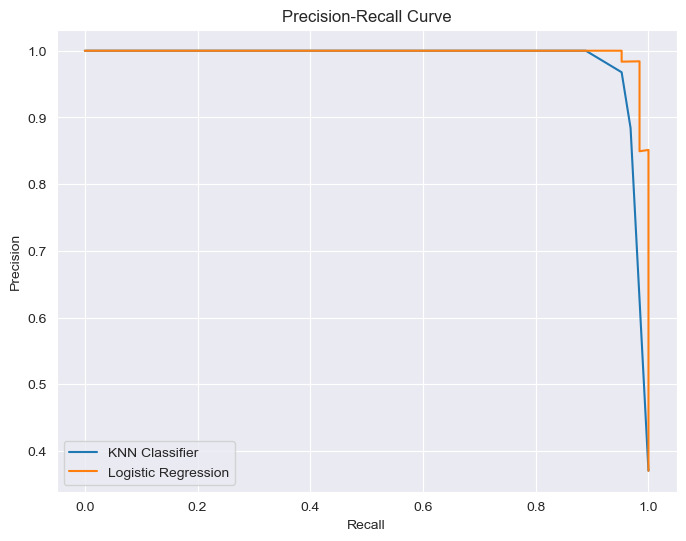

In [281]:
# convert labels to binary format because precision_recall_curve function does not want labeled data, instead it wants numeric data
y_test_binary = label_binarize(y_test, classes=['B', 'M'])

# Precision-Recall curve for KNN Classifier:
y_scores_knn = best_knn_model.predict_proba(x_test)[:, 1]
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test_binary, y_scores_knn)

# Precision-Recall curve for Logistic Regression:
y_scores_logistic = logistic_regression_model.predict_proba(x_test)[:, 1]
precision_logistic, recall_logistic, thresholds_logistic = precision_recall_curve(y_test_binary, y_scores_logistic)

# Plot precision-recall curves
plt.figure(figsize=(8, 6))
plt.plot(recall_knn, precision_knn, label='KNN Classifier')
plt.plot(recall_logistic, precision_logistic, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
# Logistic Regression Classifier method seems a little better than KNN Classifier, but both of them have a very high precision/recall ratio.

### 5.3. Choose an appropriate metric to evaulate the models. Compare the models and discuss why you chose the metric.